In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv("weatherAUS.csv")

df = df.dropna(subset=["RainTomorrow"])

df["PlayTennis"] = df["RainTomorrow"].map({"No": 1, "Yes": 0})

In [3]:
features = ["MinTemp", "MaxTemp", "Rainfall", "Humidity9am", "Humidity3pm","WindGustSpeed", "WindSpeed9am", "WindSpeed3pm","Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm","Temp9am", "Temp3pm", "RainToday"]

df = df[features + ["PlayTennis"]]

df["RainToday"] = df["RainToday"].map({"No": 0, "Yes": 1})

In [4]:
# Drop missing values
df = df.dropna()

#Fill missing values
#df.fillna(df.mean(), inplace=True)

X = df.drop("PlayTennis", axis=1)
y = df["PlayTennis"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [29]:
y_pred = model.predict(X_test)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.8511203432541034

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.55      0.63      3445
           1       0.87      0.94      0.91     11238

    accuracy                           0.85     14683
   macro avg       0.81      0.75      0.77     14683
weighted avg       0.84      0.85      0.84     14683



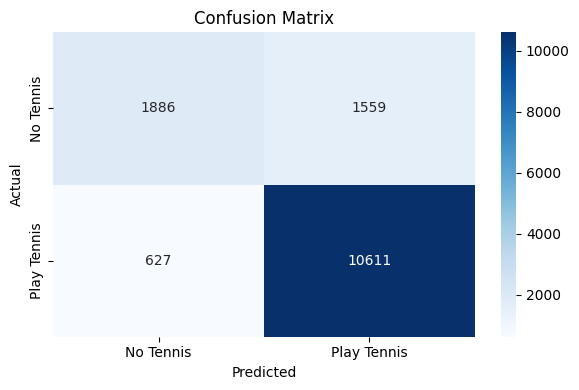

In [31]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tennis", "Play Tennis"],
            yticklabels=["No Tennis", "Play Tennis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [33]:
input_features = [ "MinTemp", "MaxTemp", "Rainfall", "Humidity9am", "Humidity3pm","WindGustSpeed", "WindSpeed9am", "WindSpeed3pm","Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm","Temp9am", "Temp3pm"]

def get_user_input():
    print("Enter weather details below to check if tennis can be played:")
    input_data = {}
    for feature in input_features:
        val = input(f"{feature}: ")
        input_data[feature] = float(val)
        
    input_data["RainToday"] = 1 if input_data["Rainfall"] >= 1.0 else 0
    return pd.DataFrame([input_data])

user_df = get_user_input()
user_prediction = model.predict(user_df)[0]

result = "Yes, you can play tennis!" if user_prediction == 1 else "No, tennis is not advisable."
print("\nPrediction result:", result)

Enter weather details below to check if tennis can be played:


MinTemp:  12.5
MaxTemp:  23.6
Rainfall:  0
Humidity9am:  68
Humidity3pm:  52
WindGustSpeed:  37
WindSpeed9am:  20
WindSpeed3pm:  18
Pressure9am:  1010
Pressure3pm:  1008
Cloud9am:  3
Cloud3pm:  4
Temp9am:  17.5
Temp3pm:  22.0



Prediction result: Yes, you can play tennis!
